<p style="text-align:center; font-size:155%;color:red;"><strong>MUSIC GENERATION MODEL</strong></p>



<p style="text-align:center; font-size:155%"><strong>UTHESH GANAPATHY E</strong></p>


## IMPORTING  MUSIC LIBRARY

In [1]:
from music21 import*
import warnings
warnings.filterwarnings('ignore')

c:\users\hariharan\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## DEFINE FUNCTION TO READ MIDI FILES

In [2]:
 def read_midi(file):
    
    print("LOADING:",file)
    notes=[]
    notes_to_parse = None
    
    # PARSING A MIDI FILE
    midi = converter.parse(file)
    
    #GROUPING INSTRUMENTS
    s2 = instrument.partitionByInstrument(midi)
    
    for part in s2.parts:
        if 'Piano' in str(part): 
            notes_to_parse = part.recurse() 
            for element in notes_to_parse:
                
                #SELECTING ONLY NOTES
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #SELECTING ONLY CHORDS
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

## LOADING MIDI FILES

In [3]:
import os
import numpy as np

path= r'C:\Users\Hariharan\HAYDN/'
files=[i for i in os.listdir(path) if i.endswith(".mid")]
notes_array = np.array([read_midi(path+i) for i in files])

LOADING: C:\Users\Hariharan\HAYDN/haydn_33_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_33_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_33_3.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_35_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_35_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_35_3.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_43_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_43_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_43_3.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_7_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_7_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_7_3.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_8_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_8_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_8_3.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_8_4.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_9_1.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_9_2.mid
LOADING: C:\Users\Hariharan\HAYDN/haydn_9_3.mid
LOADING: C:\Users\Hariharan\HAYDN/hay_40_1.mid
LOADING: C:\Users\Hariharan\HAYD

## FINDING NO OF UNIQUE NOTES

In [4]:
# CONVERTING 2D INTO 1D ARRAY

notes_ = [element for note_ in notes_array for element in note_]
unique_notes = list(set(notes_))
print(len(unique_notes))

179


## FINDING THE NOTES HAVING MORE FREQUENCY

(array([134.,  14.,  12.,   5.,   6.,   2.,   0.,   3.,   2.,   1.]),
 array([1.0000e+00, 1.4580e+02, 2.9060e+02, 4.3540e+02, 5.8020e+02,
        7.2500e+02, 8.6980e+02, 1.0146e+03, 1.1594e+03, 1.3042e+03,
        1.4490e+03]),
 <BarContainer object of 10 artists>)

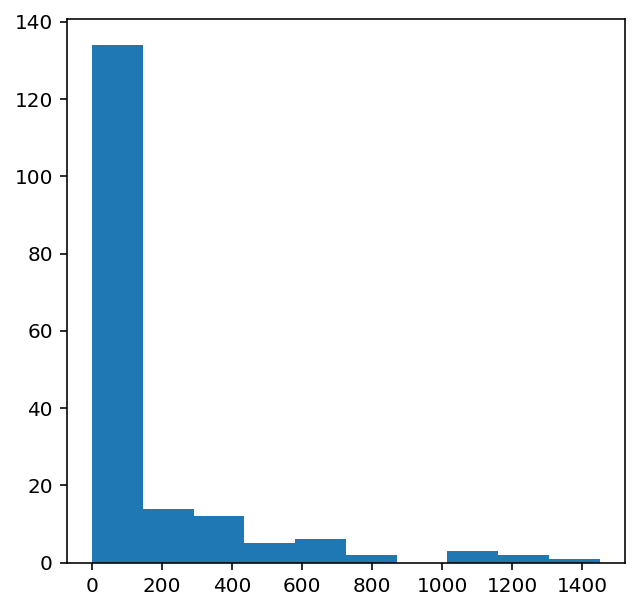

In [5]:
from collections import Counter
freq = dict(Counter(notes_))

import matplotlib.pyplot as plt
no=[count for _,count in freq.items()]
plt.figure(figsize=(5,5))
plt.hist(no)

## REMOVING THE NOTES HAVING LESS FREQUENCY

In [14]:
Frequent_notes = [note_ for note_, count in freq.items() if count>=50]
New_notes=[[i for i in j if i in Frequent_notes] for j in notes_array]
print(len(Frequent_notes))



75


## STORING THE NOTES HAVING HIGHER FREQUENCY IN DICTIONARY

In [11]:
Index_Notes = dict(enumerate(frequent_notes))
Notes_Index = dict(map(reversed,Index_Notes.items()))

In [15]:
timesteps = 30
x=[]
y=[]

for i in New_notes:
    for j in range(0,len(i)-timesteps):
        inp=i[j:j+timesteps] ; out=i[j+timesteps]
        x.append(list(map(lambda x:Notes_Index[x],inp)))
        y.append(Notes_Index[out])

x_new=np.array(x)
y_new=np.array(y)

## TRAINING AND TESTING

In [16]:
from sklearn.model_selection import train_test_split
x_new = np.reshape(x_new,(len(x_new),timesteps,1))
y_new = np.reshape(y_new,(-1,1))
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

## MODEL: <span style="color:red">LONG SHORT TERM MEMORY</span>


In [18]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout,Activation
from tensorflow.keras.models import Sequential,Model,load_model
model = Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(x_new.shape[1],x_new.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(len(Notes_Index),activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 256)           264192    
                                                                 
 dropout_2 (Dropout)         (None, 30, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 75)                19275     
                                                                 
Total params: 874,571
Trainable params: 874,571
Non-tr

## COMPILING THE MODEL TO GENERATE MUSIC

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


## FIT THE MODEL

In [20]:
model.fit(x_train,y_train,batch_size = 120,epochs = 100,validation_data=(x_test,y_test))

Epoch 1/100
159/159 [==============================] - 91s 481ms/step - loss: 3.8280 - accuracy: 0.0645 - val_loss: 3.7570 - val_accuracy: 0.0664
Epoch 2/100
159/159 [==============================] - 72s 451ms/step - loss: 3.6987 - accuracy: 0.0713 - val_loss: 3.6863 - val_accuracy: 0.0765
Epoch 3/100
159/159 [==============================] - 71s 446ms/step - loss: 3.6241 - accuracy: 0.0836 - val_loss: 3.6271 - val_accuracy: 0.0866
Epoch 4/100
159/159 [==============================] - 71s 444ms/step - loss: 3.5582 - accuracy: 0.0930 - val_loss: 3.5784 - val_accuracy: 0.0962
Epoch 5/100
159/159 [==============================] - 70s 442ms/step - loss: 3.4693 - accuracy: 0.1114 - val_loss: 3.4963 - val_accuracy: 0.1117
Epoch 6/100
159/159 [==============================] - 71s 444ms/step - loss: 3.3705 - accuracy: 0.1284 - val_loss: 3.4208 - val_accuracy: 0.1268
Epoch 7/100
159/159 [==============================] - 71s 444ms/step - loss: 3.2454 - accuracy: 0.1554 - val_loss: 3.3298 -

## SAVE THE MODEL FOR PREDICTION

In [26]:
model.save("PREDICTEDMODEL.h5")


## LOAD THE MODEL FOR PREDICTIONS

In [29]:
model = load_model("PREDICTEDMODEL.h5")
index = np.random.randint(0,len(x_test)-1)
music_pattern = x_test[index]

# STORNG THE PREDICTED NOTES IN OUTPUT
out_pred=[] 
for i in range(200):
    music_pattern = music_pattern.reshape(1,len(music_pattern),1)
    pred_index = np.argmax(model.predict(music_pattern))
    out_pred.append(Index_Notes[pred_index])
    music_pattern = np.append(music_pattern,pred_index)
    music_pattern = music_pattern[1:]

1/1 [==============================] - 0s 64ms/step


## CONVERT PREDICTED NOTES INTO MIDI MUSIC FILE

In [30]:
output_notes = []

for offset,pattern in enumerate(out_pred):
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        
        for current_note in notes_in_chord:
            i_curr_note=int(current_note)
            new_note = note.Note(i_curr_note)
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
        midi_stream = stream.Stream(output_notes)
        midi_stream.write('midi', fp='PREDICTED_MUSIC.mid')